In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)
sns.set_theme()

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [2]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


Country  isDeveloped  Lifeexpectancy  AdultMortality  \
0        Afghanistan          0.0        58.19375        269.0625   
1            Albania          0.0        75.15625         45.0625   
2            Algeria          0.0        73.61875        108.1875   
3             Angola          0.0        49.01875        328.5625   
4  AntiguaandBarbuda          0.0        75.05625        127.5000   

   infantdeaths   Alcohol  HepatitisB    Measles       BMI  under-fivedeaths  \
0       78.2500  0.014375   64.562500  2362.2500  15.51875          107.5625   
1        0.6875  4.848750   98.000000    53.3750  49.06875            0.9375   
2       20.3125  0.406667   78.000000  1943.8750  48.74375           23.5000   
3       83.7500  5.740667   70.222222  3561.3125  18.01875          132.6250   
4        0.0000  7.949333   98.266667     0.0000  38.42500            0.0000   

     Polio  Diphtheria           GDP    Population  Schooling  
0  48.3750     52.3125  4.136734e+09  9.972260e+06    8.21250  
1  98.1250     98.0625  1.166938e+09  6.969116e+05   12.13750  
2  91.7500     91.8750  7.345597e+10  2.164983e+07   12.71250  
3  46.1250     47.6875  2.177835e+10  1.014710e+07    8.04375  
4  96.9375     98.3125  0.000000e+00           NaN    8.84375

<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [3]:
#Part 1
dfLE['GDP per Capita'] = dfLE['GDP'] / dfLE['Population']

dfLE[['Country', 'GDP per Capita']].sample(10).sort_values(by='Country')


Country  GDP per Capita
28                        Cambodia      508.830482
47                         Denmark    30368.338530
49                        Dominica             NaN
57                        Ethiopia      274.144988
81                          Israel    23542.348201
82                           Italy    24858.093740
91   LaoPeople'sDemocraticRepublic             NaN
118                    Netherlands    37660.648684
131                           Peru     2330.930918
175                         Turkey     3331.124773

### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

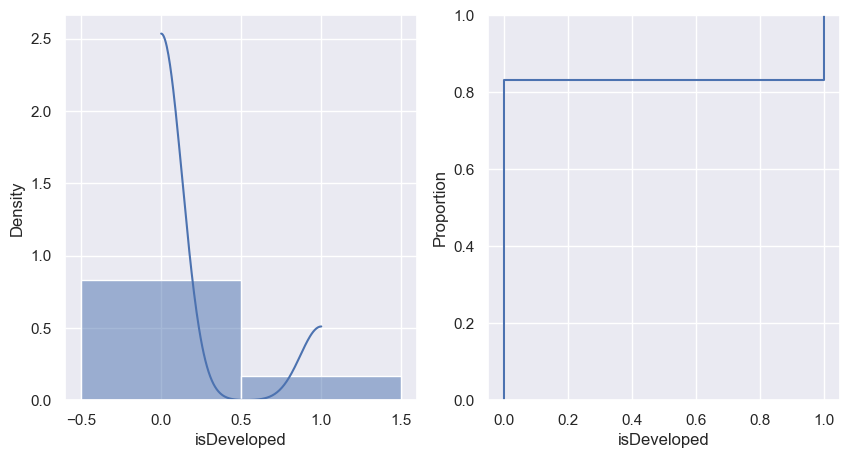

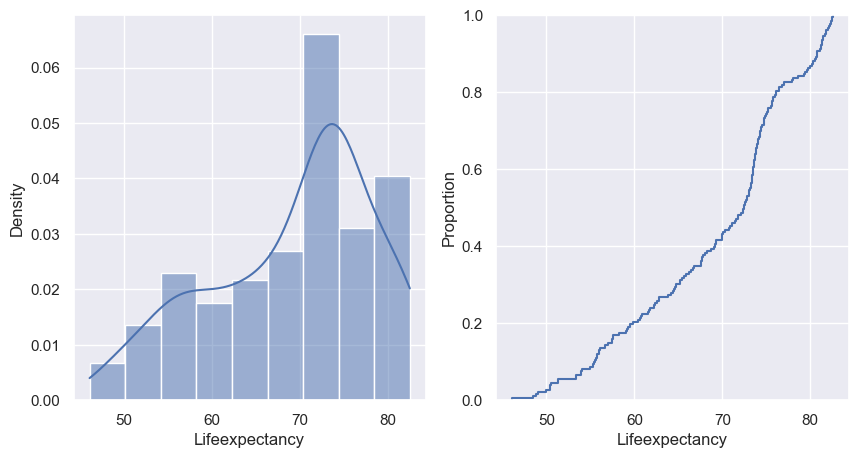

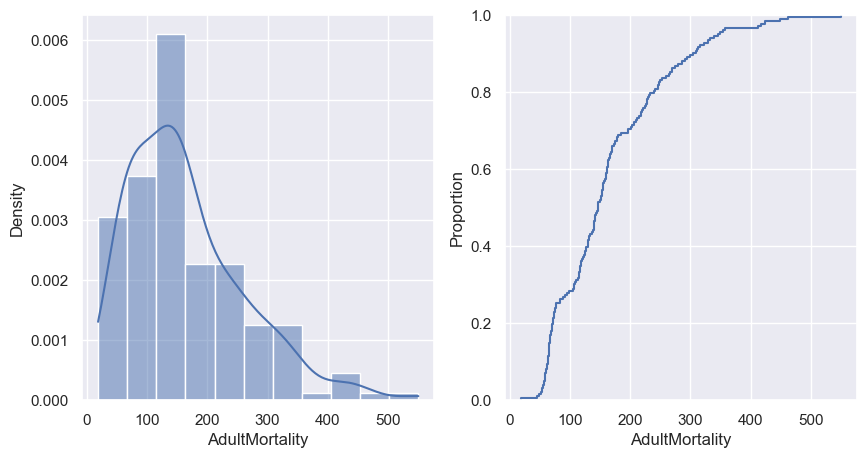

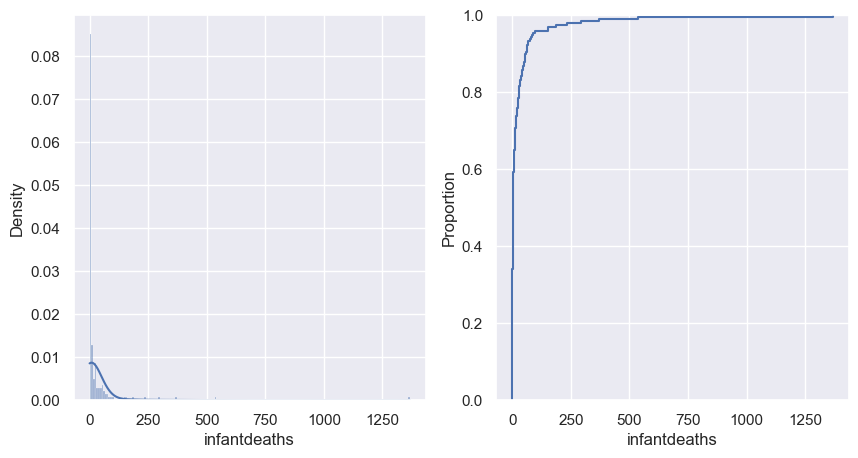

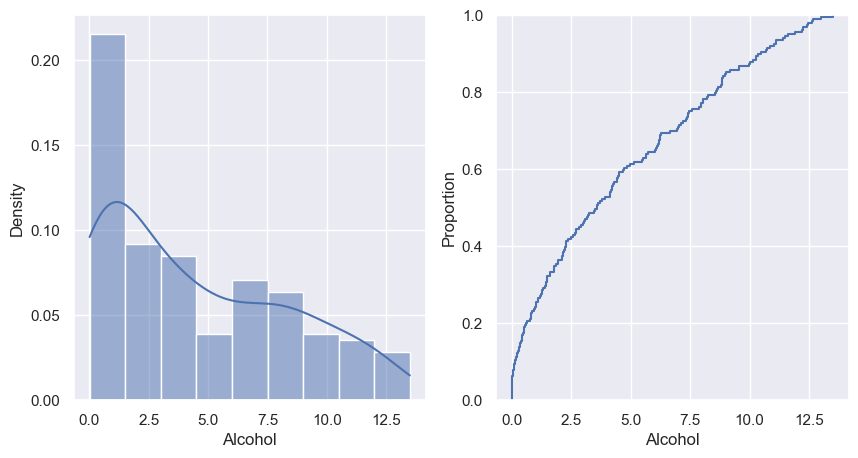

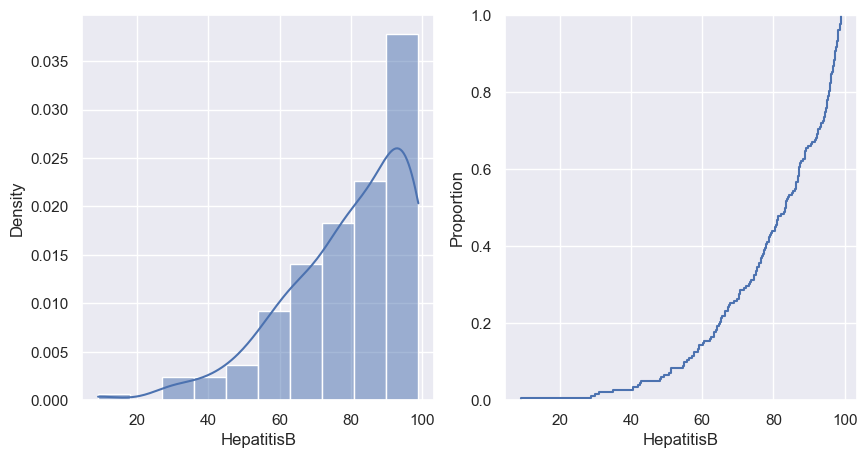

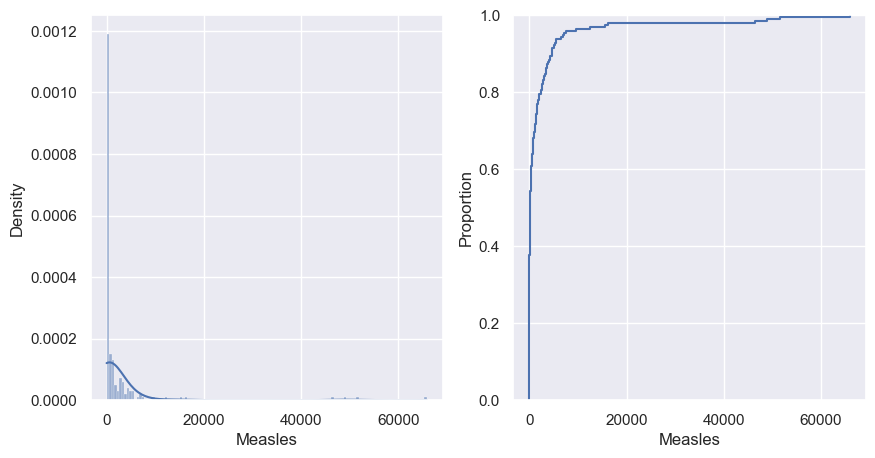

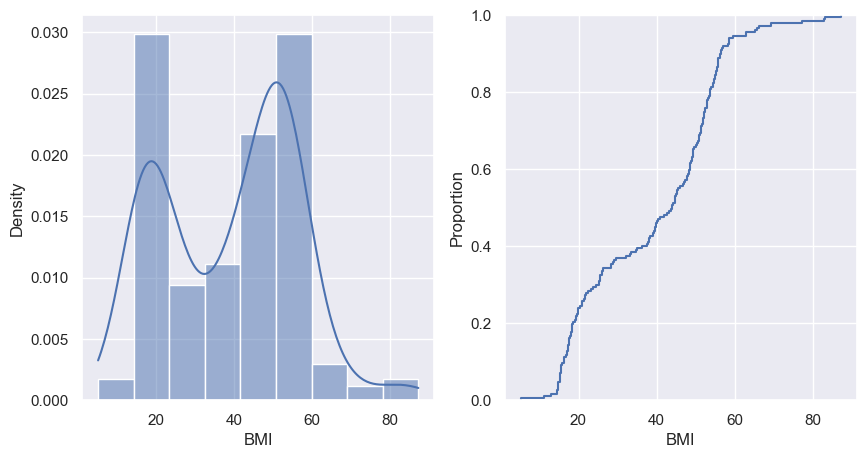

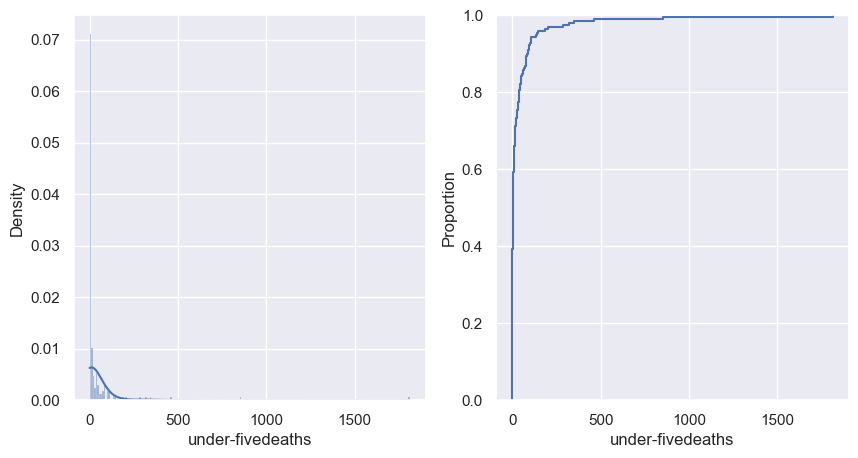

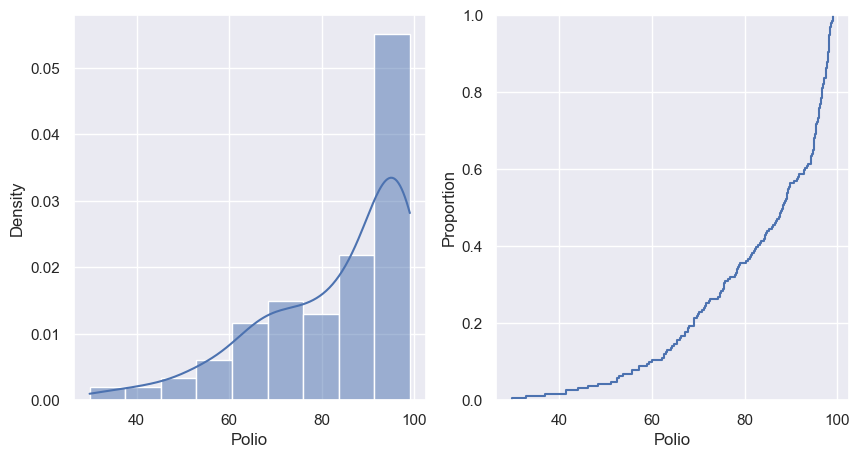

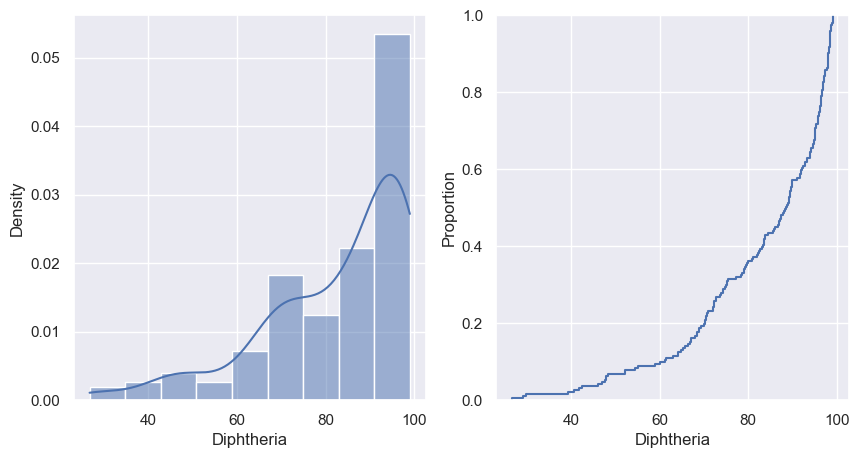

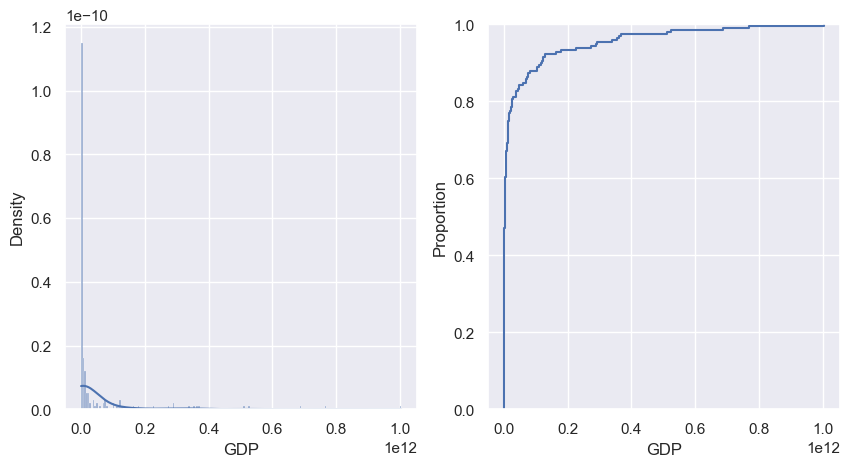

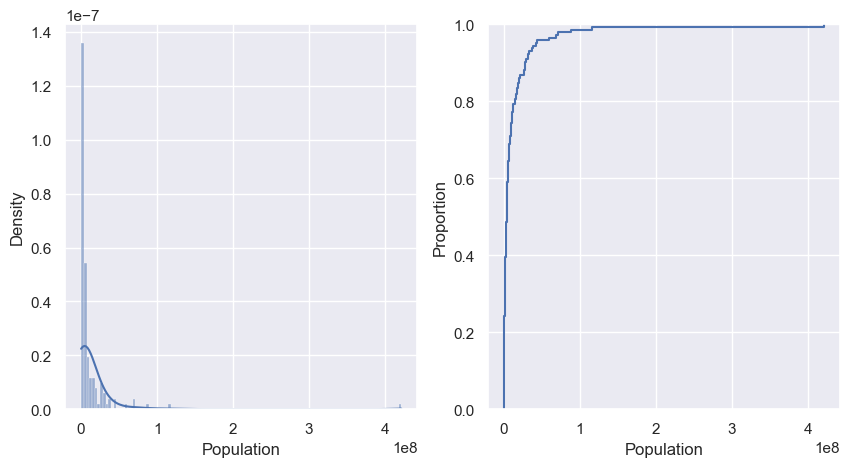

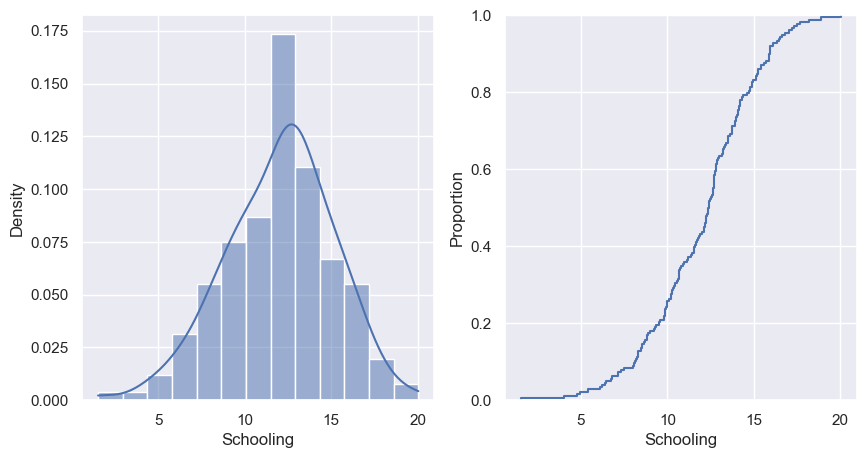

In [21]:
#Print all distributions

cols = dfLE.select_dtypes(include=[np.number]).columns

for col in cols:
    df = dfLE[col][~np.isnan(dfLE[col])]
    f, axs = plt.subplots(1, 2, figsize = (10,5))
    if col == 'isDeveloped':
        sns.histplot(data=df, discrete=True, stat='density', ax=axs[0], kde='True')
    else:
        sns.histplot(data=df, kde=True, stat='density', ax=axs[0], fill=True)
    sns.ecdfplot(data=df, ax=axs[1])
    plt.show()

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

From the above distributions, Schooling looks fairly normal. Let's compare its cdf to a normal cdf.

c:\Users\dlee2\OneDrive - NAIT\DATA3450\BSIP_Assignment_2_Students\thinkstats2.py:162: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self.d.update(obj.value_counts().iteritems())


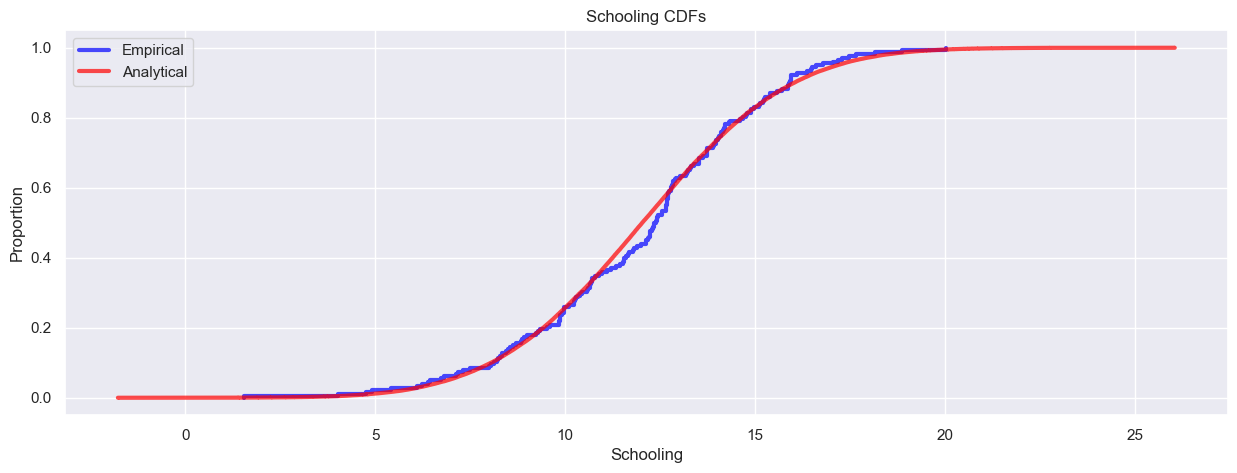

In [5]:
school = dfLE['Schooling']
school_mean = school.mean()
school_sd = school.std()

school_a = ss.norm(school_mean, school_sd).rvs(100000)

school_cdf = thinkstats2.Cdf(school, label='Empirical')
thinkplot.cdf(school_cdf, color='blue')
school_a_cdf = thinkstats2.Cdf(school_a, label='Analytical')
thinkplot.cdf(school_a_cdf, color='red')
thinkplot.config(xlabel= 'Schooling', ylabel='Proportion', title='Schooling CDFs')

Text(0.5, 1.0, 'Empirical and Analytical PDFs of Schooling')

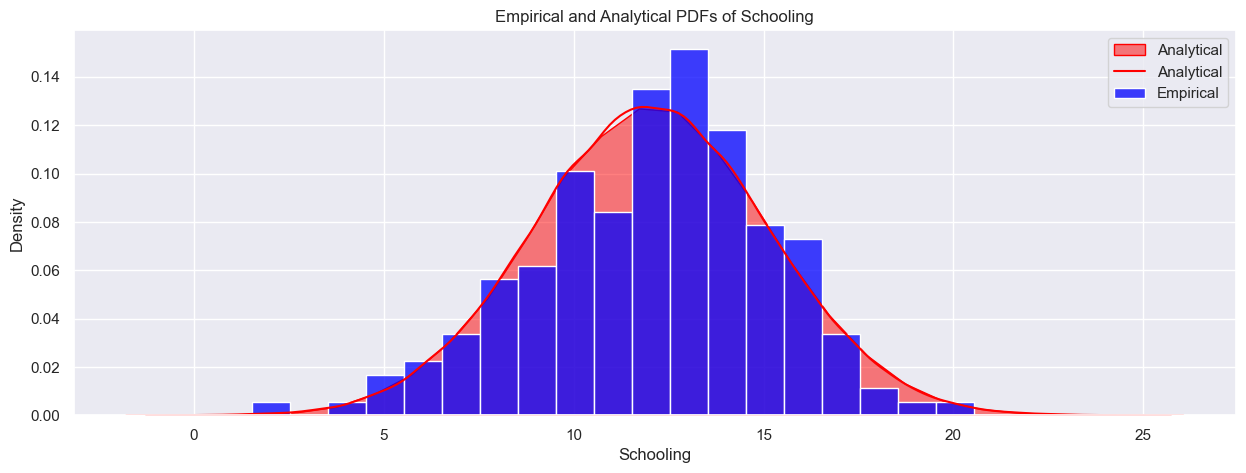

In [23]:
sns.histplot(data=school_a, binwidth=1, stat='density', kde=True, element='poly', color='red')
sns.histplot(data=school, stat='density', binwidth=1, color='blue')
plt.legend(labels = ['Analytical', 'Analytical', 'Empirical'])
plt.title('Empirical and Analytical PDFs of Schooling')

Schooling within 1 year in Canada

In [7]:
canSchool = dfLE[dfLE['Country'] == 'Canada']['Schooling'].values[0]

lowerbound = canSchool - 1
upperbound = canSchool + 1

lowerbound, upperbound

(14.875, 16.875)

In [8]:
lessthanLower = school_a_cdf.PercentileRank(lowerbound)
lessthanUpper = school_a_cdf.PercentileRank(upperbound)
withinOne = lessthanUpper - lessthanLower

print(f"An estimated {withinOne:.2f}% of Countries have a Schooling level within 1 year of Canada's schooling level.")

An estimated 11.93% of Countries have a Schooling level within 1 year of Canada's schooling level.


### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

##### Looks like it could be <b>LOGNORMAL</b> based on the Seaborn plots above. Let's try that.

Take log of Data to and plot it against a normal distribution

In [9]:
#Analytical for GDP/capita
gpc = dfLE['GDP per Capita'][~np.isnan(dfLE['GDP per Capita'])]

logGpc = np.log10(gpc)
logGpc_mu = logGpc.mean()
logGpc_sd = logGpc.std()
logGpc_cdf = thinkstats2.Cdf(logGpc)
xs, ps = thinkstats2.RenderNormalCdf(logGpc_mu, logGpc_sd, low=logGpc.min(), high=logGpc.max())

c:\Users\dlee2\OneDrive - NAIT\DATA3450\BSIP_Assignment_2_Students\thinkstats2.py:162: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self.d.update(obj.value_counts().iteritems())


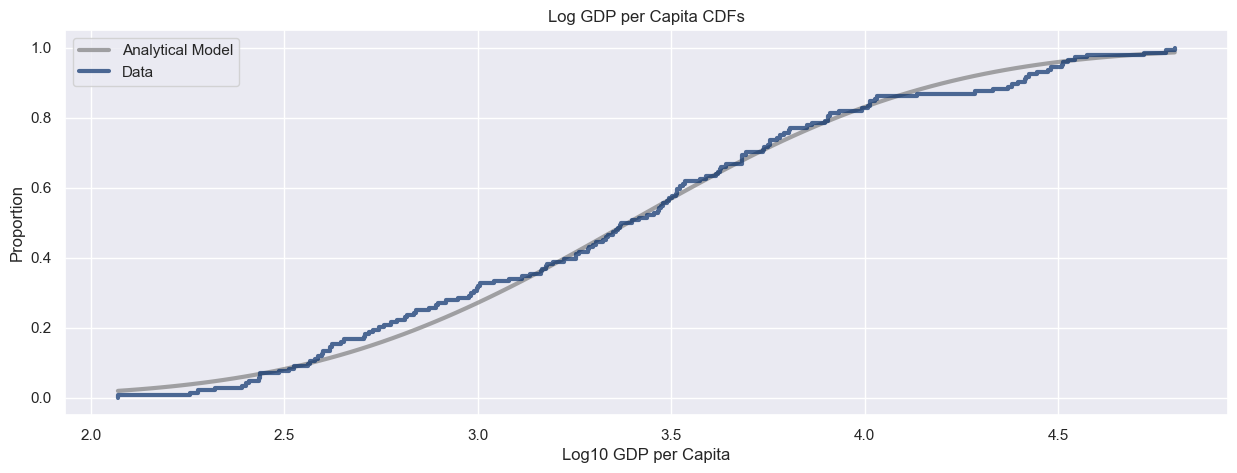

In [10]:
thinkplot.Plot(xs, ps, label='Analytical Model', color='0.5')
thinkplot.Plot(logGpc_cdf, label='Data')
thinkplot.Config(xlabel='Log10 GDP per Capita', ylabel='Proportion', title='Log GDP per Capita CDFs')

Create analytical distribution of Log GDP per Capita

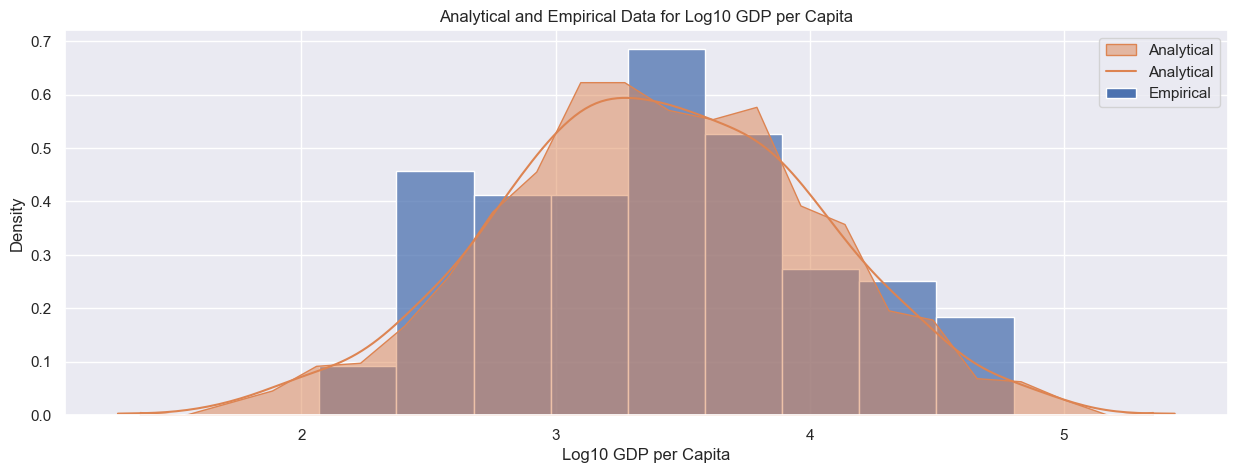

In [11]:
# Use Scipy Stats to create normal analytical distribution based on LOG'd data
logGpc_a = ss.norm(logGpc_mu, logGpc_sd)

# Plot PDF's for another visual
sns.histplot(data=logGpc, stat='density', element='bars')
sns.histplot(data=logGpc_a.rvs(1000), kde=True, element='poly', stat='density')
plt.xlabel('Log10 GDP per Capita')
plt.title('Analytical and Empirical Data for Log10 GDP per Capita')
plt.legend(labels=['Analytical', 'Analytical', 'Empirical'])
plt.show()

Seems like a decently good fit.

In [12]:
# Plug in some Log(GDP per Capita values) 
threehun = logGpc_a.cdf(math.log10(300))
thou = logGpc_a.cdf(math.log10(1000))

print('Less than 300 GDP')
print('Percent:',threehun) 
print('Countries:', threehun*195)
print()
print('Less than 1000 GDP')
print('Percent:', thou) 
print('Countries:', thou*195)

Less than 300 GDP
Percent: 0.07661134094600355
Countries: 14.939211484470693

Less than 1000 GDP
Percent: 0.2710759424869368
Countries: 52.85980878495267


There are 195 countries. 
Our analytical distribution estimates that approximately 15 countries (around 8%) have below \$300 USD GDP per Capita. However, according to [Statista](https://www.statista.com/statistics/256547/the-20-countries-with-the-lowest-gdp-per-capita/), Burundi is the only country (approximately 0.5% of population) with below $300 USD GDP per Capita.

Our analytical distribution estimates that approximately 53 countries (or 27%) have below \$1000 USD GDP per Capita or . However, the website above only lists about 20 (about 10%) countries having below \$1000 GDP per Capita.

In [13]:
dfLE[dfLE['Country'] == 'Canada']

Country  isDeveloped  Lifeexpectancy  AdultMortality  infantdeaths  \
30  Canada          0.0         81.6875          64.625           2.0   

     Alcohol  HepatitisB  Measles      BMI  under-fivedeaths    Polio  \
30  8.053333   28.846154    129.5  55.8625               2.0  85.3125   

    Diphtheria           GDP    Population  Schooling  GDP per Capita  
30     91.0625  3.384881e+11  1.136405e+07     15.875    29785.859548

In addition, Canada's calculated GDP per Capita from the dataframe is fairly low compared to its 2021 value of around \$52,000 USD.

<b>Based on the above, I would say it's an unreliable metric.</b>

In [14]:
# Drop it
dfLE.drop(columns='GDP per Capita', inplace=True)

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

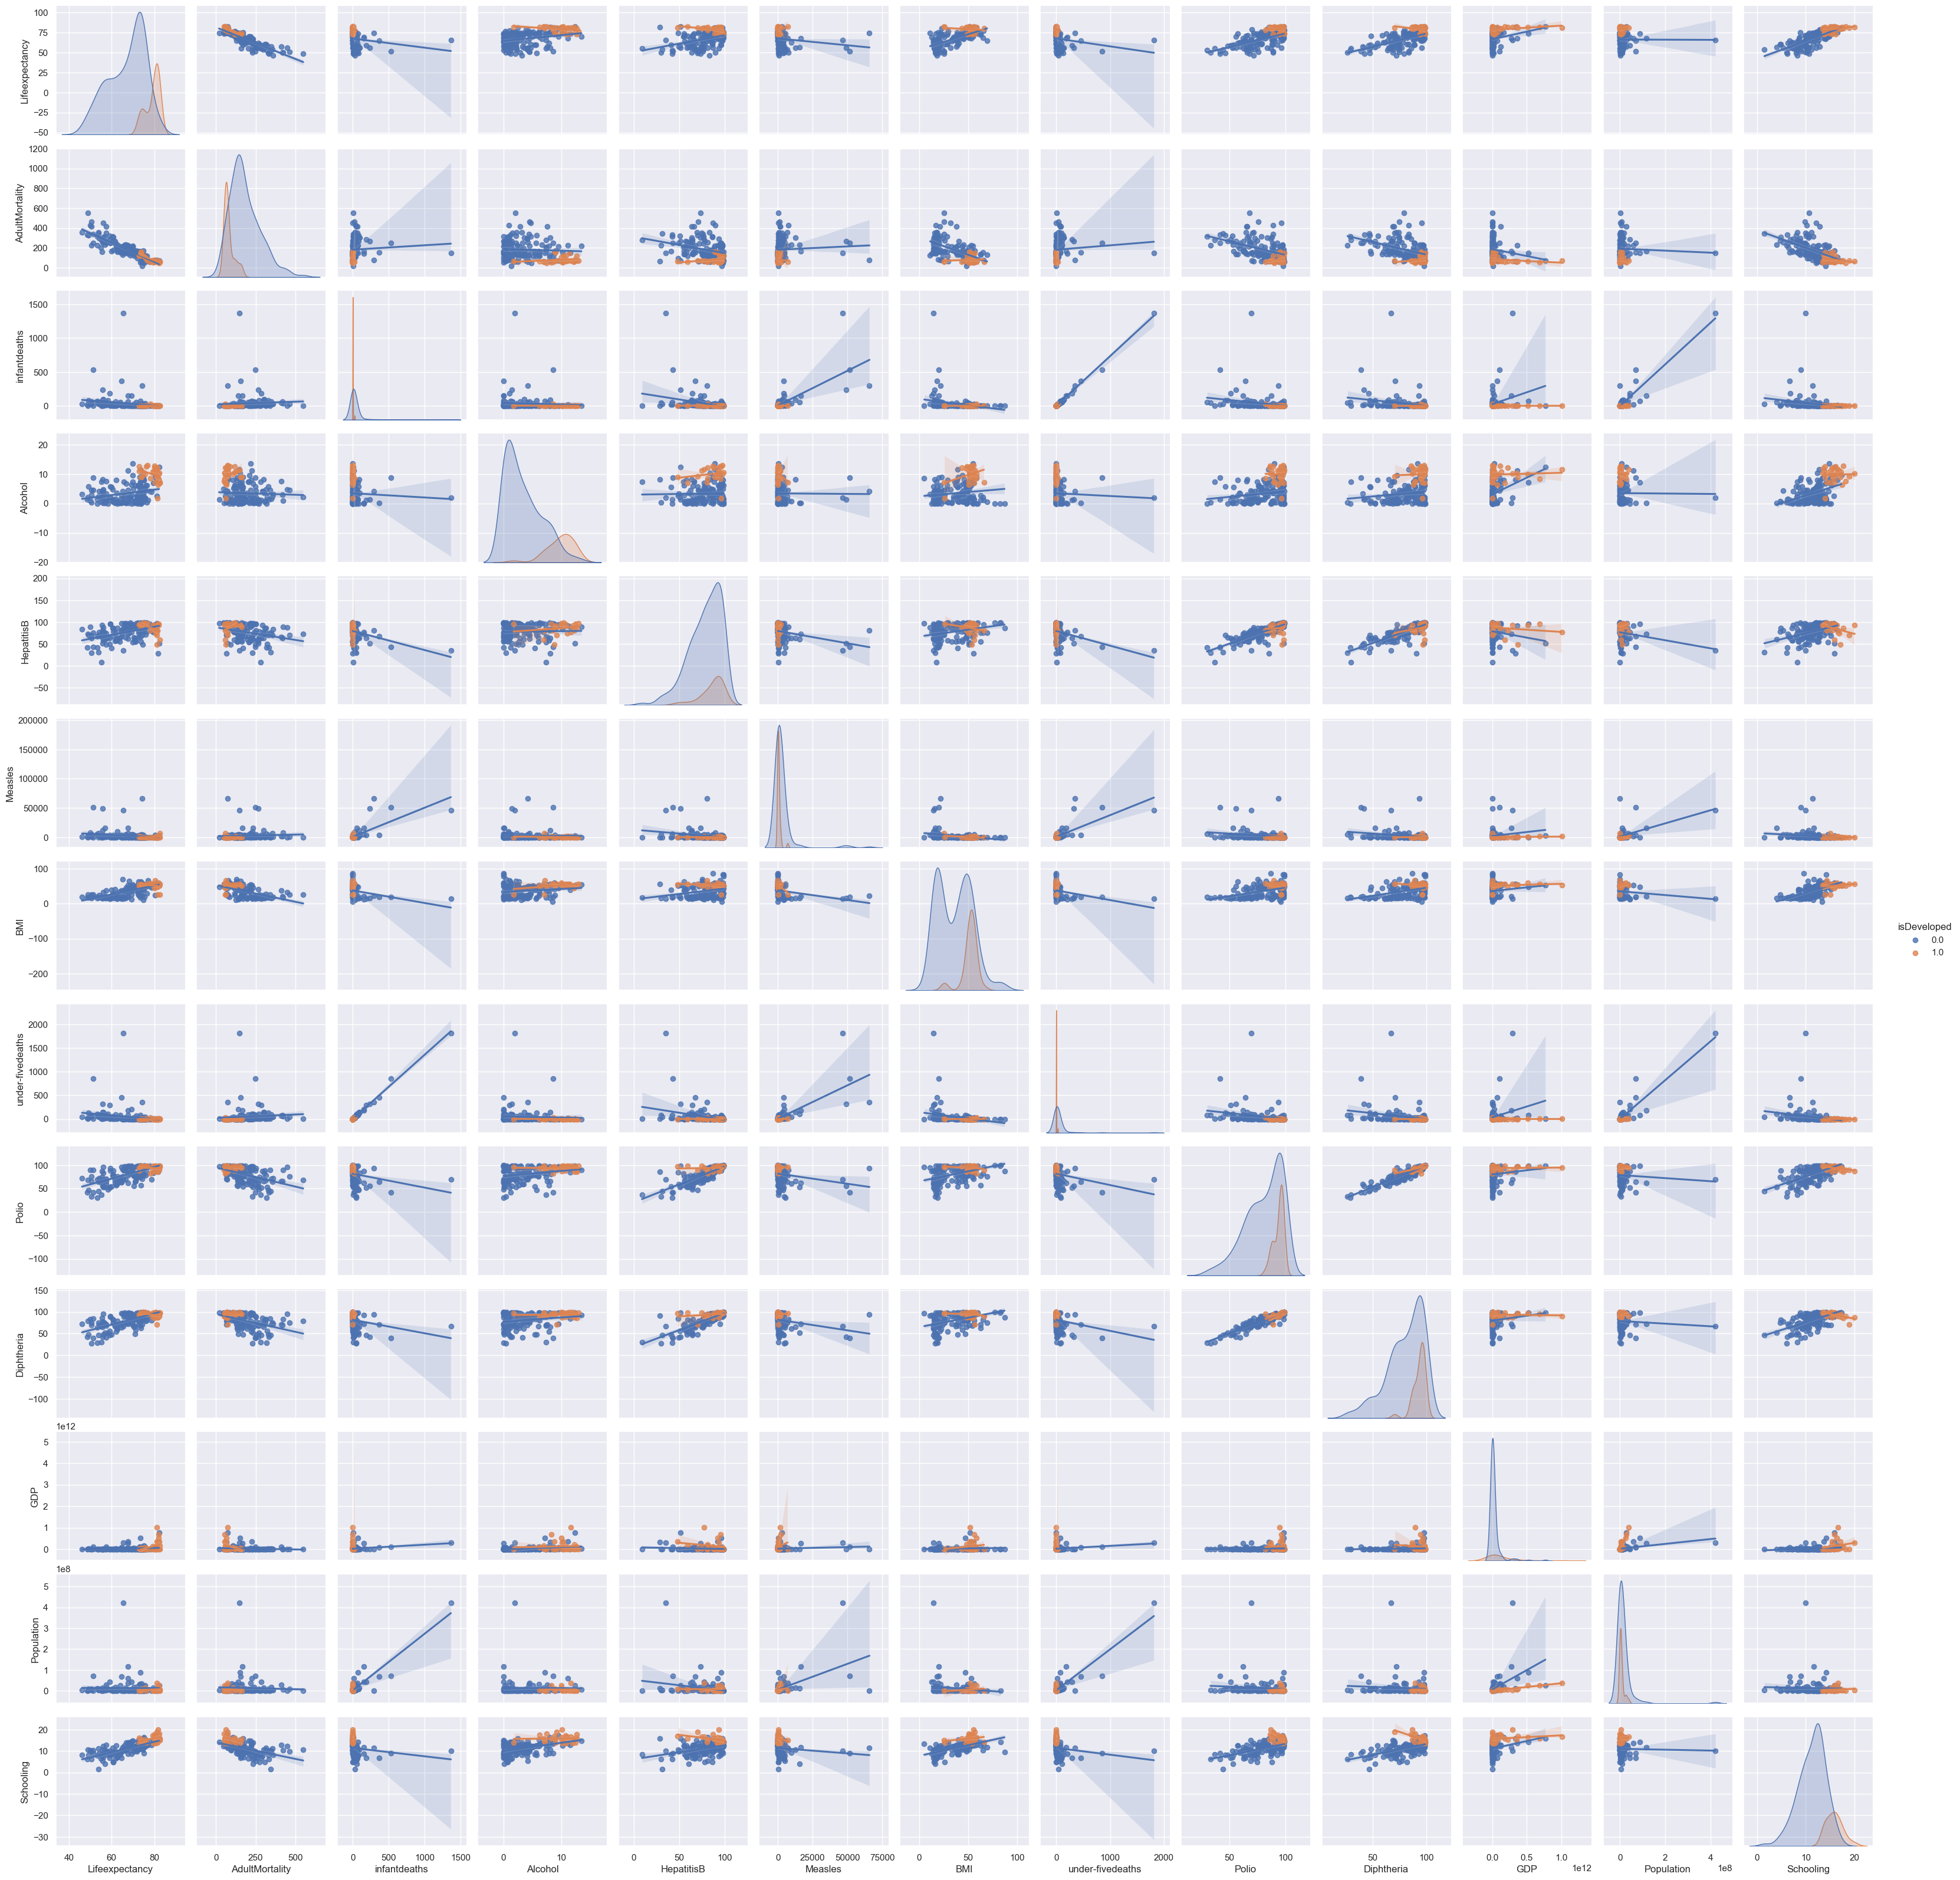

In [15]:
#Visualize correlations. 
sns.pairplot(dfLE, hue='isDeveloped', kind='reg', dropna=True)
plt.show()

Looking at the above pairplots, I filtered out outliers by looking at dots that looked really far off from all the other dots by looking at the scales of the graphs. There are still some points that are a little far from the rest of the data but compared outliers removed, they aren't nearly as far. I didn't want to remove too many datapoints.

<ul>
Here are my filters:
    <ul>
    <li>Remove population > 200000000
    <li>Remove measles > 50000
    <li>Remove under-fivedeaths > 200
    <li>Remove infantdeaths > 100
    </ul>
</ul>

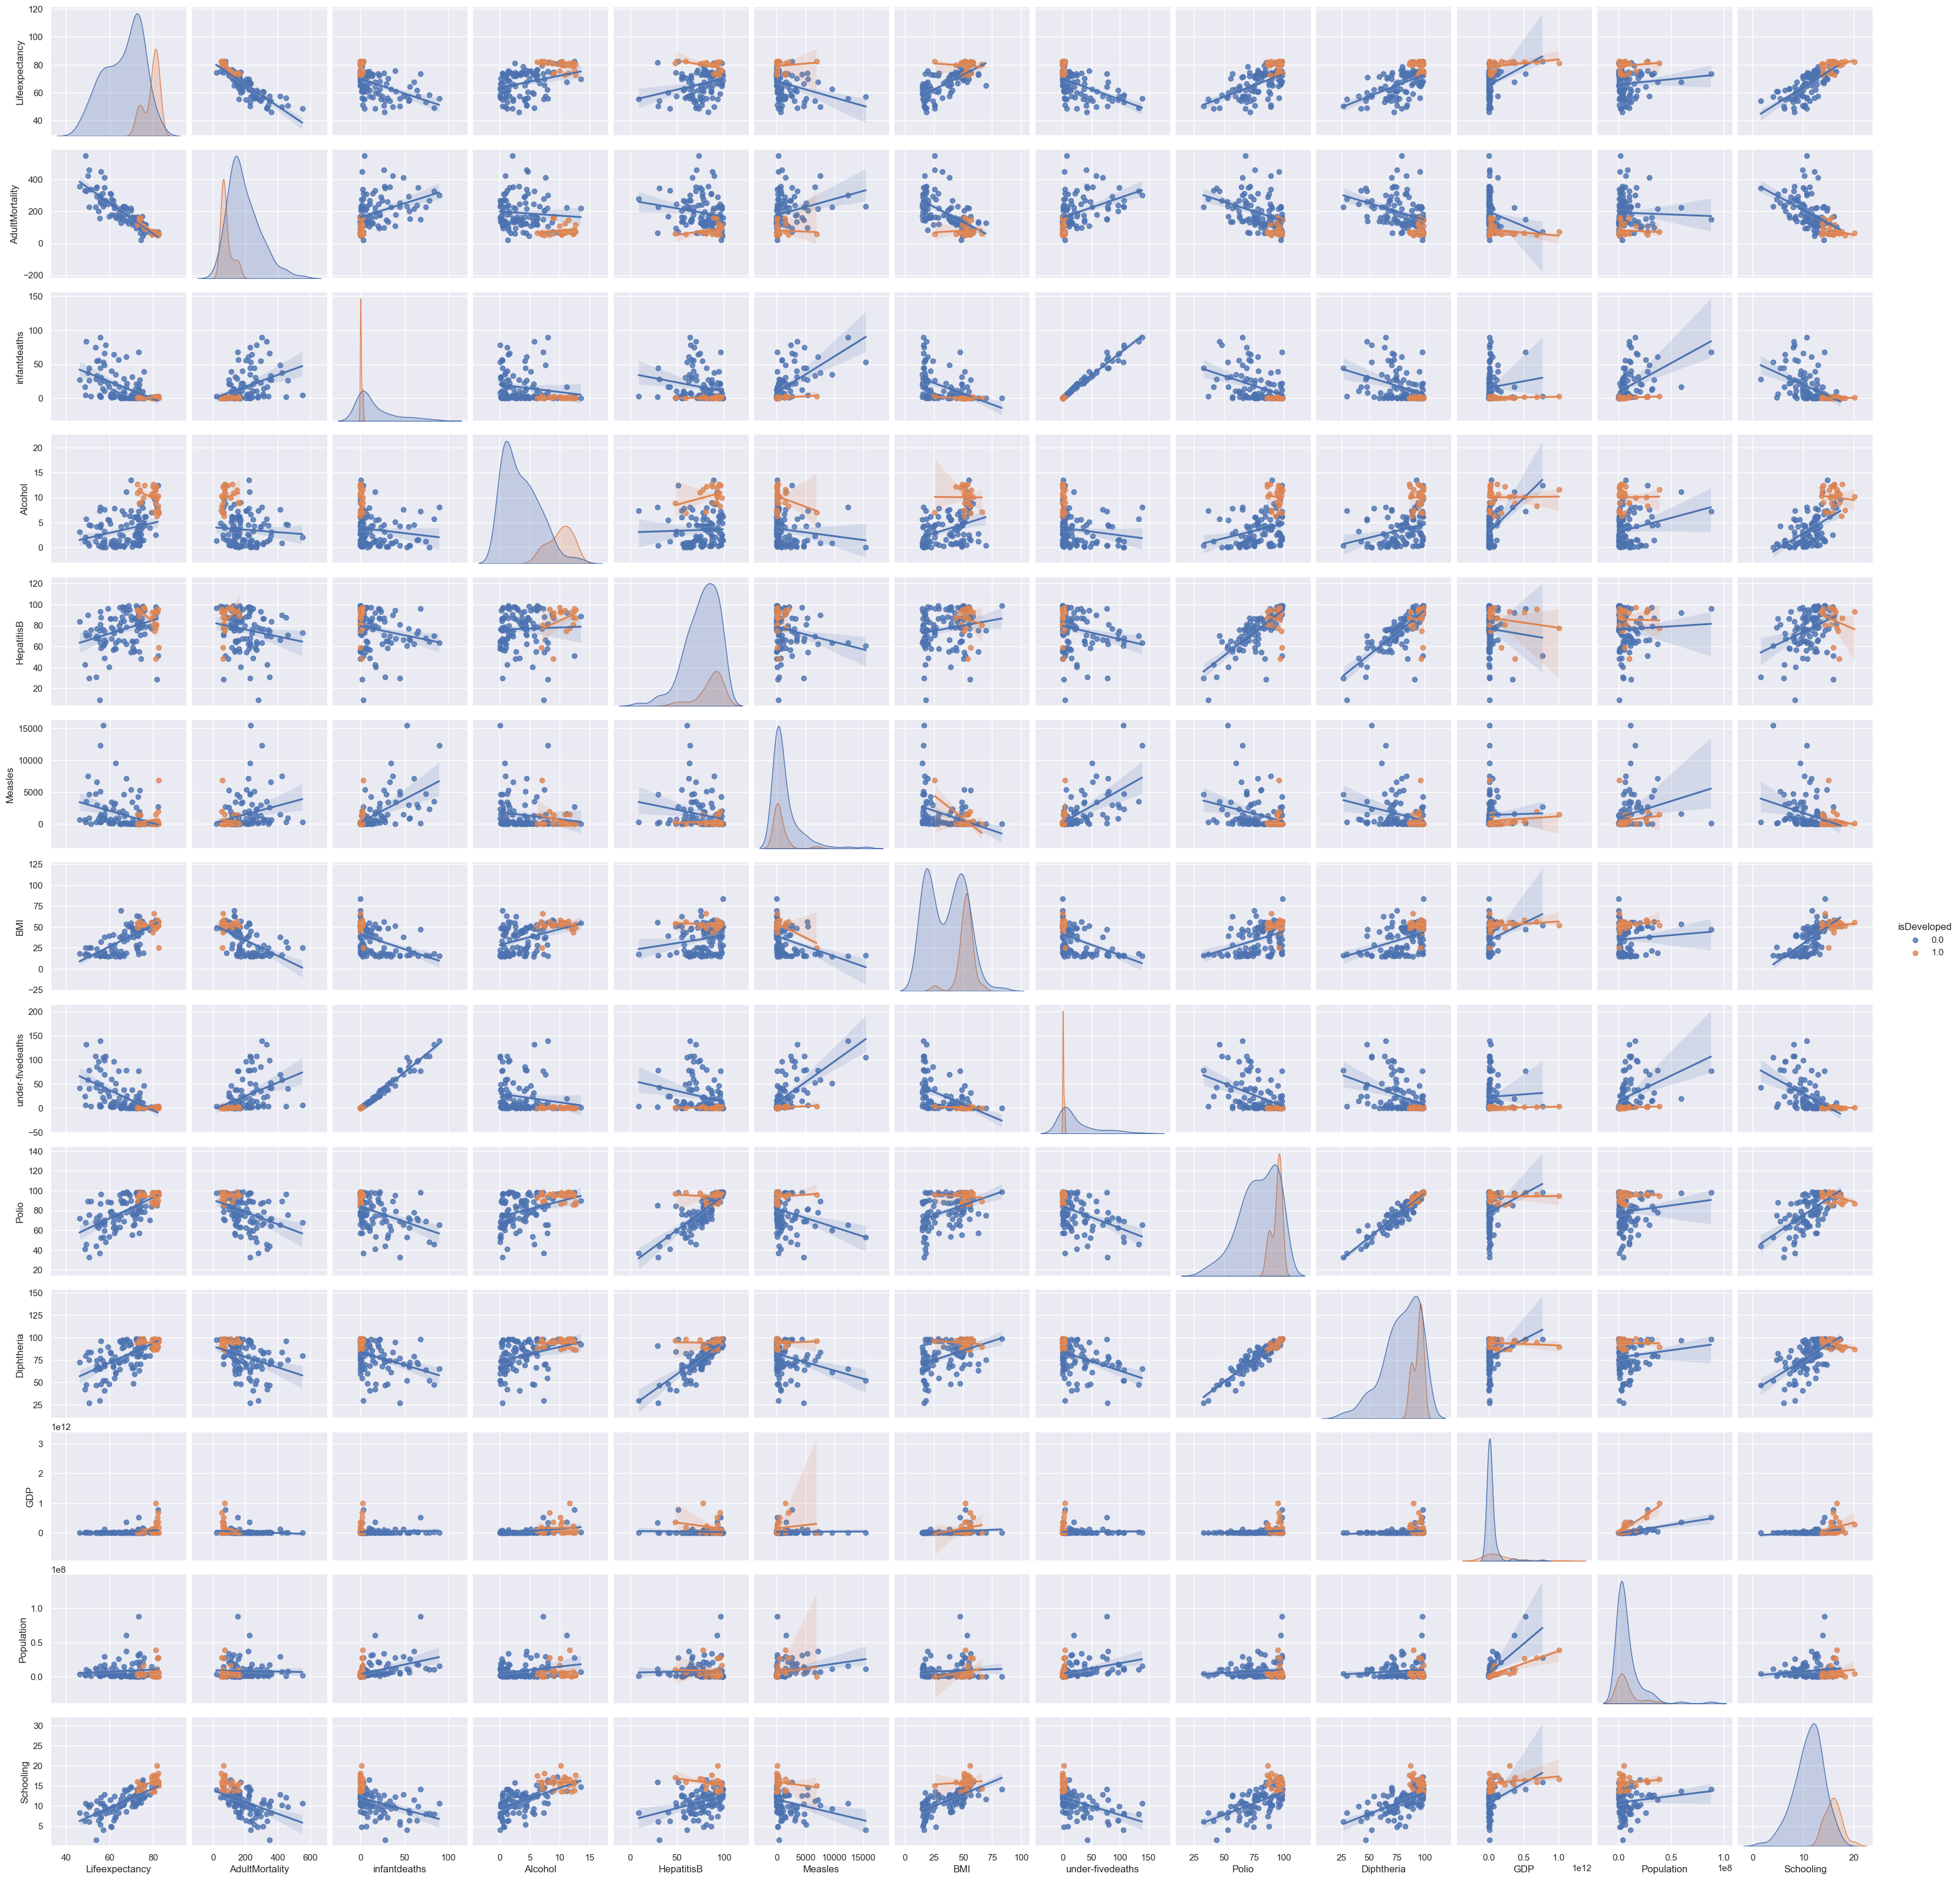

In [16]:
ndfLE = dfLE[dfLE['Population'] < 200000000]
ndfLE = ndfLE[ndfLE['Measles'] < 50000]
ndfLE = ndfLE[ndfLE['under-fivedeaths'] < 200]
ndfLE = ndfLE[ndfLE['infantdeaths'] < 100]
sns.pairplot(data=ndfLE, hue='isDeveloped', kind='reg')

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [17]:
# Calculate correlations and analyze. 

# Correlation table for developed
corrdf = ndfLE.drop(columns=['Country']).apply(pd.to_numeric, errors='coerce')
corrDev = corrdf[corrdf['isDeveloped'] == 1]
corrDev = corrDev.drop(columns=['isDeveloped'])
corrDev = corrDev.corr()

# Correlation table for not developed
corrNDev = corrdf[corrdf['isDeveloped'] != 1]
corrNDev = corrNDev.drop(columns=['isDeveloped'])
corrNDev = corrNDev.corr()

# We want just life expectancy column
corrDev = corrDev['Lifeexpectancy']
corrNDev = corrNDev['Lifeexpectancy']

#### Developed ####

In [18]:
corrDev.sort_values(key=abs, ascending=False)

Lifeexpectancy      1.000000
AdultMortality     -0.913419
HepatitisB         -0.444695
Schooling           0.421606
GDP                 0.397959
Alcohol            -0.339404
Diphtheria         -0.251107
Population          0.185499
Measles             0.146984
BMI                -0.122783
Polio              -0.065301
infantdeaths       -0.030502
under-fivedeaths    0.002945
Name: Lifeexpectancy, dtype: float64

#### Not Developed ####

In [19]:
corrNDev.sort_values(key=abs, ascending=False)

Lifeexpectancy      1.000000
AdultMortality     -0.864174
Schooling           0.738282
BMI                 0.736245
Polio               0.586583
Diphtheria          0.586435
under-fivedeaths   -0.559517
infantdeaths       -0.511908
Measles            -0.339071
HepatitisB          0.317562
GDP                 0.302939
Alcohol             0.294241
Population          0.106053
Name: Lifeexpectancy, dtype: float64

<b>Strongest Correlations for Developed Countries:</b>
<ul>
<li>Adult Mortality, Hepatitis B, Schooling
</ul>

<b>Strongest Correlations for Developing Countries:</b>
<ul>
<li>Adult Mortality, Schooling, BMI
</ul>

<b>Analysis of Correlations</b>

<ul>
<b>Adult Mortality</b>

Both show a fairly strong negative correlation with Adult Mortality. A quick google search about adult mortality shows that Adult Mortality Rate is a the probability of death between 15 and 60 years of age out of 1000 people. The negative correlation makes sense because the more likely you are to die between 15 and 60, the more it will affect life expectancy. I think this is a causal relationship because if you're more likely to die, then there are probably more deaths reported at a lower age, therefore greatly impacting the life expectency of a Country.

<b>Hepatitis B</b>

Many cases can result in death from liver damage and cancer. It makes sense that there is some correlation with life expectancy. However, there are acute cases and life expectancy estimates of people with Hepatitis B are not very low (around 70 - 80 years old). There's probably a number of other things that could cause death within that time frame. Maybe developed countries don't have to deal with a lot of those risks so this is more of a factor that affects life expectancy than other things. I think this aligns with the relatively weak correlation. I think countries with universal vaccination can probably reduce the number of deaths due to Hepatitis B as well. Since estimated life expectancy of people with Hepatitis B is fairly high and the correlation is relatively low, I don't think there is enough evidence to suggest a causal relationship between life expectancy and Hepatitis B.

<b>Schooling</b>

I think there are probably a variety of confounding variables that can affect the relationship between number of years of schooling and life expectancy. For example, being at school under the supervision of an adult can be safer than an alternative activity. The knowledge you gain from school can also prevent you from encountering risks that may put your life in danger or help you deal with dangerous situations. Schooling can also be related to occupations of different risk levels and different incomes. Maybe there is a correlation between income and life expectancy as well. I think the correlation seems realistic that there is a positive relationship between school and life expectancy. Perhaps, there are more severe risks to not being in school in developing countries. The relationship could be causal but could also indicate a variety of factors that also impact life expectancy. We cannot say forsure that more schooling makes you live longer.

<b>BMI</b>

I think a higher BMI can indicate a number of things. It could mean you eat more food which means you can afford more food which means you have more money in general. If you have more money you could potentially avoid some dangerous situations. If you eat more food you could avoid dying of starvation. Lower BMI could also be correlated with other serious health conditions that impact your life expectancy. Seems reasonable that there is a strong positive correlation between higher BMI and life expectancy. I don't think the relationship is causal since there are so many other variables and we can't say forsure that people who weigh more will live longer.

</ul>




#### Substantially Different Relationships ####

In [20]:
corrdiff = np.absolute(corrDev - corrNDev)
corrdiff.sort_values(ascending=False)

BMI                 0.859028
Diphtheria          0.837542
HepatitisB          0.762257
Polio               0.651884
Alcohol             0.633644
under-fivedeaths    0.562462
Measles             0.486055
infantdeaths        0.481406
Schooling           0.316675
GDP                 0.095021
Population          0.079446
AdultMortality      0.049245
Lifeexpectancy      0.000000
Name: Lifeexpectancy, dtype: float64

<b>There are significantly different correlations with regards to BMI in developed and developing countries. Strong negative in developing countries and weak positive in developed countries.</b>

Perhaps in poorer countries, you're more likely to die earlier from malnutrition and illnesses that cause a lower BMI. In developed countries, less people have to face the same challenges regarding food and illnesses. Having an unreasonably high BMI is possible if you can afford lots of food which is a problem that is likely less common in poorer countries. A really high BMI can also be correlated with health conditions that can affect your life expectancy. Some data that would support this would be deaths due to starvation or malnutrition as well as data on obesity related deaths.

<b>There are also significantly different correlations with regards to Diphtheria in developed and developing countries. Moderate positive for developing countries and weaker negative for developed countries.</b>

Cases of diphptheria in developed countries are rare due to widespread vaccination against the disease. So it is only a threat to few people in those areas. In developing countries where vaccination rates are low, more people may be living with Diphtheria. People who lie in crowded and unsanitary conditions (most likely developing countries) are more at risk for catching Diphtheria, especially cutaneous Diphtheria. Cutaneous infection rarely results in severe diseases. However, having diphtheria may cause individuals to seek treatment could possibly get vaccines or treatment for other things they may be dealing with. This might be a reason that explaisn the positive correlation between number of diphtheria cases and life expectancy. Something that could confirm this would be data on if people had other concerns treated when if they were treated for Diphtheria.

